# This is a classification model analysis of the Game of Thrones dataset

# Descriptive statistics

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# loading data
got = pd.read_excel('./GOT_character_predictions.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [2]:
# pulling up data dictionary
got_description = pd.read_excel('./GOT_data_dictionary.xlsx')


# displaying the data dictionary
got_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [3]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {got.shape[0]}
Features:     {got.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     25



In [4]:
# descriptive stats of numerical data
got.describe(include = 'number').round(decimals = 2)

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.00,433.00,1946.0,1946.00,1946.00,1946.00,1946.00,21.00,26.00,23.00,276.00,1946.00,1946.00,433.00,1946.00,1946.00,1946.00
mean,973.50,1577.36,0.2,0.37,0.48,0.59,0.40,0.71,0.19,0.65,0.78,0.14,0.46,-1293.56,0.31,0.09,0.75
std,561.91,19565.41,0.4,0.48,0.50,0.49,0.49,0.46,0.40,0.49,0.42,0.35,0.50,19564.34,1.38,0.16,0.44
min,1.00,-28.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00,0.00
25%,487.25,240.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.01,0.00
50%,973.50,268.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,27.00,0.00,0.03,1.00
75%,1459.75,285.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,50.00,0.00,0.09,1.00
max,1946.00,298299.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,15.00,1.00,1.00


In [5]:
# gathering information about the data
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

# Creating a new column for gender

I tried using gender guesser to predict which character was male or female.
However, I decided to remove this variable from the dataset.
This is because after running correlations between male and isAlive, the correlation was 0.
So I believe it will not benefit in the classification model.

# Dealing with missing values

In [6]:
# checking for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [7]:
# imputing missing values dateOfBirth
got['dateOfBirth'].fillna(got['dateOfBirth'].median(), inplace = True)

# imputing missing values for age
got['age'].fillna(int(got['age'].median()), inplace = True)


# instatiating an imputation text for features with missing values
fill_title   = 'm_title'
fill_culture = 'm_culture'
fill_mother  = 'm_mother'
fill_father  = 'm_father'
fill_heir    = 'm_heir'
fill_house   = 'm_house'
fill_spouse  = 'm_spouse'


# imputing missing values for title
got['title'] = got['title'].fillna(fill_title) 

# creating a new column with a placeholder object
got['has_title'] = 0

# making dummy where m_title = 0 and those with title = 1
for index, value in got.iterrows():
    
    # Creating a dummy for has_title = 1, so missing values = 0
    if got.loc[index, 'title'] != 'm_title':
        got.loc[index, 'has_title'] = 1
        
    elif got.loc[index, 'title'] == 'm_title':
        got.loc[index, 'has_title'] = 0
        
        
# imputing missing values for culture
got['culture'] = got['culture'].fillna(fill_culture)

# creating a new column with a placeholder object
got['has_culture'] = 0

# making dummy where m_culture = 0 and those with culture = 1
for index, value in got.iterrows():
    
    # Creating a dummy for has_culture = 1, so missing values = 0
    if got.loc[index, 'culture'] != 'm_culture':
        got.loc[index, 'has_culture'] = 1
        
    elif got.loc[index, 'culture'] == 'm_culture':
        got.loc[index, 'has_culture'] = 0
        

# imputing missing values for mother
got['mother'] = got['mother'].fillna(fill_mother)

# creating a new column with a placeholder object
got['has_mother'] = 0

# making dummy where m_mother = 0 and those with mother = 1
for index, value in got.iterrows():
    
    # Creating a dummy for has_mother = 1, so missing values = 0
    if got.loc[index, 'mother'] != 'm_mother':
        got.loc[index, 'has_mother'] = 1
        
    elif got.loc[index, 'mother'] == 'm_mother':
        got.loc[index, 'has_mother'] = 0

            
# imputing missing values for father
got['father'] = got['father'].fillna(fill_father)

# creating a new column with a placeholder object
got['has_father'] = 0

# making dummy where m_father = 0 and those with father = 1
for index, value in got.iterrows():
    
    # Creating a dummy for has_father = 1, so missing values = 0
    if got.loc[index, 'father'] != 'm_father':
        got.loc[index, 'has_father'] = 1
        
    elif got.loc[index, 'father'] == 'm_father':
        got.loc[index, 'has_father'] = 0
        
        
# imputing missing values for heir
got['heir'] = got['heir'].fillna(fill_heir)

# creating a new column with a placeholder object
got['has_heir'] = 0

# making dummy where m_heir = 0 and those with heir = 1
for index, value in got.iterrows():
    
    # Creating a dummy for has_heir = 1, so missing values = 0
    if got.loc[index, 'heir'] != 'm_heir':
        got.loc[index, 'has_heir'] = 1
        
    elif got.loc[index, 'heir'] == 'm_heir':
        got.loc[index, 'has_heir'] = 0


# imputing missing values for house
got['house'] = got['house'].fillna(fill_house)

# creating a new column with a placeholder object
got['has_house'] = 0

# making dummy where m_house = 0 and those with house = 1
for index, value in got.iterrows():
    
    # Creating a dummy for has_house = 1, so missing values = 0
    if got.loc[index, 'house'] != 'm_house':
        got.loc[index, 'has_house'] = 1
        
    elif got.loc[index, 'house'] == 'm_house':
        got.loc[index, 'has_house'] = 0
        
        
# imputing missing values for spouse
got['spouse'] = got['spouse'].fillna(fill_spouse)

# creating a new column with a placeholder object
got['has_spouse'] = 0

# making dummy where m_spouse = 0 and those with spouse = 1
for index, value in got.iterrows():
    
    # Creating a dummy for has_spouse = 1, so missing values = 0
    if got.loc[index, 'spouse'] != 'm_spouse':
        got.loc[index, 'has_spouse'] = 1
        
    elif got.loc[index, 'spouse'] == 'm_spouse':
        got.loc[index, 'has_spouse'] = 0
    
    
# creating a loop to fill missing values for isAliveMother
for index, value in got.iterrows():
    
    # imputing missing values for isAliveMother with the same value as has_mother
    if got.loc[index, 'has_mother'] == 1:
        got.loc[index, 'isAliveMother'] = 1
        
    elif got.loc[index, 'has_mother'] == 0:
        got.loc[index, 'isAliveMother'] = 0

        
# creating a loop to fill missing values for isAliveFather
for index, value in got.iterrows():
    
    # imputing missing values for isAliveFather with the same value as has_father
    if got.loc[index, 'has_father'] == 1:
        got.loc[index, 'isAliveFather'] = 1
        
    elif got.loc[index, 'has_father'] == 0:
        got.loc[index, 'isAliveFather'] = 0      

        
# creating a loop to fill missing values for isAliveHeir
for index, value in got.iterrows():
    
    # imputing missing values for isAliveHeir with the same value as has_heir
    if got.loc[index, 'has_heir'] == 1:
        got.loc[index, 'isAliveHeir'] = 1
        
    elif got.loc[index, 'has_heir'] == 0:
        got.loc[index, 'isAliveHeir'] = 0 
        
        
# creating a loop to fill missing values for isAliveSpouse
for index, value in got.iterrows():
    
    # imputing missing values for isAliveSpouse with the same value as has_spouse
    if got.loc[index, 'has_spouse'] == 1:
        got.loc[index, 'isAliveSpouse'] = 1
        
    elif got.loc[index, 'has_spouse'] == 0:
        got.loc[index, 'isAliveSpouse'] = 0


I am assuming that if the dataset has names for the mothers, fathers and spouse,
then most likely they are alive. If the names of these groups are not present, 
then I assume they are not alive.

In [8]:
# checking the dataset for imputation of missing vaalues
got.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,has_title,has_culture,has_mother,has_father,has_heir,has_house,has_spouse
0,1,Viserys II Targaryen,m_title,m_culture,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,m_house,m_spouse,0,0,0,0,0,1.0,1.0,1.0,0.0,0,0,27.0,11,0.605351,0,0,0,1,1,1,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,m_mother,m_father,m_heir,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,1,1,0,0,0,1,1
2,3,Addison Hill,Ser,m_culture,268.0,m_mother,m_father,m_heir,House Swyft,m_spouse,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.267559,1,1,0,0,0,0,1,0
3,4,Aemma Arryn,Queen,m_culture,82.0,m_mother,m_father,m_heir,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,1.0,1,1,23.0,0,0.183946,0,1,0,0,0,0,1,1
4,5,Sylva Santagar,Greenstone,Dornish,276.0,m_mother,m_father,m_heir,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,1,1,0,0,0,1,1
5,6,Tommen Baratheon,m_title,m_culture,268.0,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,m_house,m_spouse,0,0,0,0,0,1.0,1.0,1.0,0.0,0,0,27.0,5,1.000000,1,0,0,1,1,1,0,0
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,m_mother,m_father,m_heir,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,0.0,0.0,0.0,1.0,1,1,26.0,0,0.431438,0,1,1,0,0,0,1,1
7,8,Viserys I Targaryen,m_title,m_culture,268.0,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,m_house,m_spouse,0,0,0,0,0,1.0,1.0,1.0,0.0,0,0,27.0,5,0.678930,0,0,0,1,1,1,0,0
8,9,Wilbert,Ser,m_culture,268.0,m_mother,m_father,m_heir,m_house,m_spouse,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.006689,0,1,0,0,0,0,0,0
9,10,Wilbert Osgrey,Ser,m_culture,268.0,m_mother,m_father,m_heir,House Osgrey,m_spouse,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1,27.0,0,0.020067,1,1,0,0,0,0,1,0


In [9]:
# double checking that missing values are gone
got.isnull().sum(axis = 0)

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
has_title                     0
has_culture                   0
has_mother                    0
has_father                    0
has_heir                      0
has_house                     0
has_spou

In [10]:
# creating correlation between features 
got_corr = got.corr(method = 'pearson')

# filtering the results to only show correlations with isAlive
got_corr.loc[ : ,"isAlive"].round(decimals = 2).sort_values(ascending = False)



isAlive                       1.00
book4_A_Feast_For_Crows       0.27
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
has_house                    -0.04
has_culture                  -0.04
has_title                    -0.04
isMarried                    -0.05
dateOfBirth                  -0.05
has_spouse                   -0.05
isAliveSpouse                -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.13
has_heir                     -0.13
S.No                         -0.13
isAliveFather                -0.14
isAliveMother                -0.14
has_mother                   -0.14
has_father                   -0.14
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [11]:
# checking frequency for feature isAlive to stratify train_test_split
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

# Preparing for predictive modeling

In [12]:
# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)


# declaring response variable
got_target = got.loc[ : , 'isAlive']

In [13]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)


In [14]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [15]:
# Feature engineering that I tried

# Variable for book 1, 2 & 3 combined to use for predictive modeling
got['book_1_2_3'] = (got['book1_A_Game_Of_Thrones']) + (got['book2_A_Clash_Of_Kings']) + (got['book3_A_Storm_Of_Swords']/3)

# Variable for book 4 and book 5 combined to use for predictive modeling
got['book_4_5'] = (got['book4_A_Feast_For_Crows']) + (got['book5_A_Dance_with_Dragons']/2)

# Variable for has title and has house combined to use for predictive modeling
got['has_title_has_house'] = (got['has_title']) + (got['has_house']/2)

# Variable for numDeadRelations and has_heir combined to use for predictive modeling
got['numDeadRel_has_heir'] = (got['has_heir']) + (got['numDeadRelations']/2)

# Variable for numDeadRelations, has_heir and isAliveMother combined to use for predictive modeling
got['numDeadRel_has_heir_AliveM'] = (got['has_heir']) + (got['numDeadRelations']) + (got['isAliveMother']/3)

# Variable for has_heir and isAliveMother combined to use for predictive modeling
got['has_heir_AliveM'] = (got['has_heir']) + (got['isAliveMother']/2)

# Variable for has_mother + isAliveHeir combined to use for predictive modeling
got['has_mother_AliveH'] = got['has_mother']+(got['isAliveHeir']/2)



In [16]:
# creating loop to extract all the explanatory variables
for val in got:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 isAlive + 
 has_title + 
 has_culture + 
 has_mother + 
 has_father + 
 has_heir + 
 has_house + 
 has_spouse + 
 book_1_2_3 + 
 book_4_5 + 
 has_title_has_house + 
 numDeadRel_has_heir + 
 numDeadRel_has_heir_AliveM + 
 has_heir_AliveM + 
 has_mother_AliveH + 


In [17]:
# Example 1
# instantiating a logistic regression model object with as many variables as possible 
logit_full = smf.logit(formula = """     isAlive ~
                                         dateOfBirth + 
                                         book1_A_Game_Of_Thrones + 
                                         book2_A_Clash_Of_Kings + 
                                         book3_A_Storm_Of_Swords + 
                                         book4_A_Feast_For_Crows + 
                                         book5_A_Dance_with_Dragons + 
                                         isAliveMother +
                                         age + 
                                         numDeadRelations + 
                                         popularity + 
                                         has_title +
                                         has_father +  
                                         has_spouse""",
                                         data    = got_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary2()

Optimization terminated successfully.
         Current function value: 0.433772
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.235     
Dependent Variable:     isAlive              AIC:                  1547.0695 
Date:                   2021-12-19 21:50     BIC:                  1623.6207 
No. Observations:       1751                 Log-Likelihood:       -759.53   
Df Model:               13                   LL-Null:              -992.53   
Df Residuals:           1737                 LLR p-value:          2.4058e-91
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         10.0000                                              
-----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------
Intercept                  -60.1798   8.0655 -7.4614 0.0000 -75.9878 -44.3717
dateOfBirth                  0.2082   0.0274  7.6079 0.0000   0.1545   0.2618
book1_A_Game_Of_Thrones     -0.6162   0.1645 -3.7455 0.0002  -0.9387  -0.2938
book2_A_Clash_Of_Kings      -0.6618   0.1467 -4.5117 0.0000  -0.9493  -0.3743
book3_A_Storm_Of_Swords     -0.5208   0.1524 -3.4183 0.0006  -0.8194  -0.2222
book4_A_Feast_For_Crows      1.3709   0.1608  8.5231 0.0000   1.0557   1.6862
book5_A_Dance_with_Dragons  -0.1344   0.1528 -0.8799 0.3789  -0.4338   0.1650
isAliveMother               -1.1703   1.1867 -0.9862 0.3241  -3.4962   1.1556
age                          0.2082   0.0274  7.6088 0.0000   0.1546   0.2618
numDeadRelations            -0.0623   0.0630 -0.9897 0.3223  -0.1858   0.0611
popularity                  -2.0452   0.5883 -3.4763 0.0005  -3.1984  -0.8921
has_title                    0.0499   0.1334  0.3738 0.7086  -0.2116   0.3113
has_father                  -0.0365   0.9786 -0.0373 0.9703  -1.9545   1.8815
has_spouse                   0.2142   0.2188  0.9791 0.3275  -0.2146   0.6431
=============================================================================

"""

In [18]:
# Example 2
# instantiating a logistic regression model object with most significant variables
logit_sig = smf.logit(formula = """      isAlive ~
                                         dateOfBirth + 
                                         book1_A_Game_Of_Thrones + 
                                         book2_A_Clash_Of_Kings + 
                                         book3_A_Storm_Of_Swords + 
                                         book4_A_Feast_For_Crows + 
                                         isAliveMother +
                                         age +
                                         popularity""",
                                         data    = got_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.434608
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.233     
Dependent Variable:    isAlive             AIC:                 1539.9972 
Date:                  2021-12-19 21:50    BIC:                 1589.2087 
No. Observations:      1751                Log-Likelihood:      -761.00   
Df Model:              8                   LL-Null:             -992.53   
Df Residuals:          1742                LLR p-value:         5.8451e-95
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        11.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -59.5026   7.8987 -7.5332 0.0000 -74.9839 -44.0214
dateOfBirth               0.2059   0.0268  7.6807 0.0000   0.1534   0.2585
book1_A_Game_Of_Thrones  -0.6515   0.1619 -4.0236 0.0001  -0.9688  -0.3341
book2_A_Clash_Of_Kings   -0.6488   0.1456 -4.4576 0.0000  -0.9341  -0.3635
book3_A_Storm_Of_Swords  -0.5211   0.1517 -3.4348 0.0006  -0.8184  -0.2237
book4_A_Feast_For_Crows   1.3523   0.1506  8.9782 0.0000   1.0571   1.6475
isAliveMother            -1.4011   0.7146 -1.9606 0.0499  -2.8018  -0.0004
age                       0.2059   0.0268  7.6816 0.0000   0.1534   0.2585
popularity               -2.2435   0.4680 -4.7942 0.0000  -3.1607  -1.3263
==========================================================================

"""

In [19]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['dateOfBirth', 'book1_A_Game_Of_Thrones',
                    'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 
                    'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 
                    'isAliveMother', 'age', 'numDeadRelations',  
                    'popularity', 'has_title', 'has_father', 'has_spouse'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['dateOfBirth', 'book1_A_Game_Of_Thrones',
                    'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 
                    'book4_A_Feast_For_Crows', 'isAliveMother', 'age', 
                    'popularity']

}

# Logistic regression

In [20]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'newton-cg',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print(f"""Logistic Regression Model
      """)
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# displaying and saving the gap between training and testing
print('Train Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)


# saving AUC score for future use - AUC score for logistic regression
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

# SCORING AUC result
print('AUC score        :',roc_auc_score(y_true  = y_test,
                                         y_score = logreg_pred).round(decimals = 4))

Logistic Regression Model
      
Training ACCURACY: 0.807
Testing  ACCURACY: 0.8462
Train Test Gap   : 0.0392
AUC score        : 0.7197


/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [22]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 3
True Positives : 142



# Classification Trees (CART Models)

In [23]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score        :', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC for full tree
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9046
Full Tree Testing ACCURACY : 0.8103
Full Tree AUC Score        : 0.7545


In [24]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 19
True Positives : 126



In [25]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 7,
                                     min_samples_leaf = 1,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

# displaying and saving the gap between training and testing
print('Train Test Gap   :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
logreg_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)



Training ACCURACY: 0.8395
Testing  ACCURACY: 0.8667
AUC Score        : 0.7924
Train Test Gap   : 0.0272


In [27]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 8
True Positives : 137



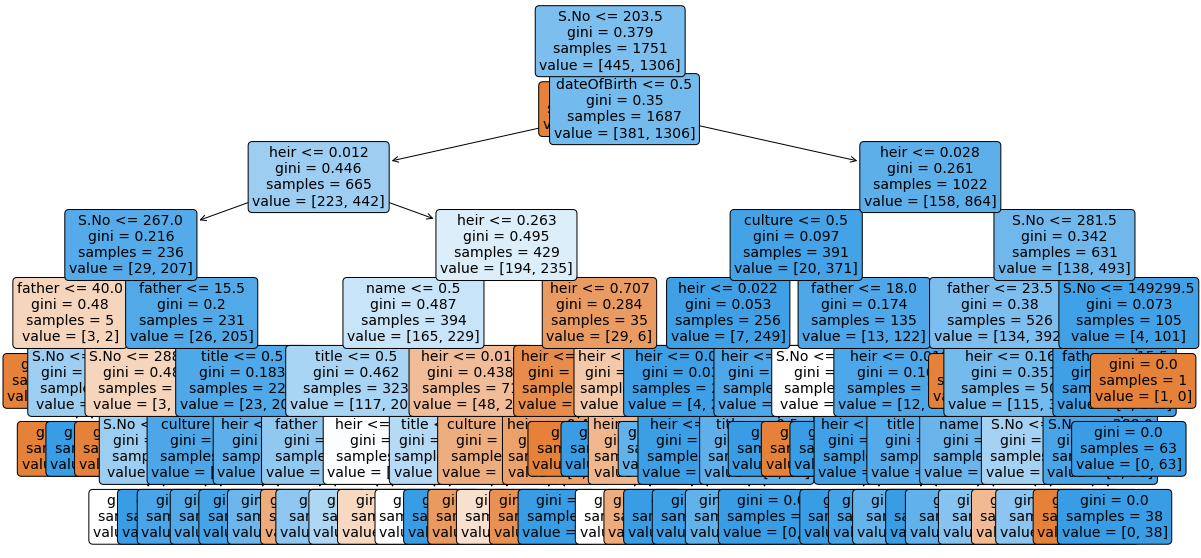

In [28]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

# Summary

In [29]:
# comparing results
print(f"""
Model         AUC Score   Training Accuracy   Testing Accuracy      TN, FP, FN, TP
-----         ---------   -----------------   ----------------      --------------
Logistic      {logreg_auc_score}      {logreg_fit.score(x_train, y_train).round(4)}               {logreg_fit.score(x_test, y_test).round(4)}                {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}      {full_tree_fit.score(x_train, y_train).round(4)}              {full_tree_fit.score(x_test, y_test).round(4)}                {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
*Pruned Tree  {pruned_tree_auc_score}      {pruned_tree_fit.score(x_train, y_train).round(4)}              {pruned_tree_fit.score(x_test, y_test).round(4)}                {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}

Final Model Chosen: Pruned Tree Classification Tree
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}




Model         AUC Score   Training Accuracy   Testing Accuracy      TN, FP, FN, TP
-----         ---------   -----------------   ----------------      --------------
Logistic      0.7197      0.807               0.8462                (23, 27, 3, 142)
Full Tree     0.7545      0.9046              0.8103                (32, 18, 19, 126)
*Pruned Tree  0.7924      0.8395              0.8667                (32, 18, 8, 137)

Final Model Chosen: Pruned Tree Classification Tree

